In [1]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [2]:
attach(iris)

In [3]:
cor(iris[,1:4])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


### 주성분분석에서 차원을 축소할때 독립변수 간에 상관관계가 높을수록 잘 뽑힌다.

In [4]:
ir.pca <- prcomp(iris[,1:4], center=T, scale= T)
ir.pca

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

### center= T, scale= T는 변수들의 평균을 빼고, 편차로 나누어 표준화 한다는 의미

### PC1 = 0.521*Sepal.Length -0.2693*Sepal.Width+ ````

In [6]:
summary(ir.pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

#### pc1은 전체분산의 72.96% 설명
#### pc2은 전체분산의 22.85% 설명 ``` 

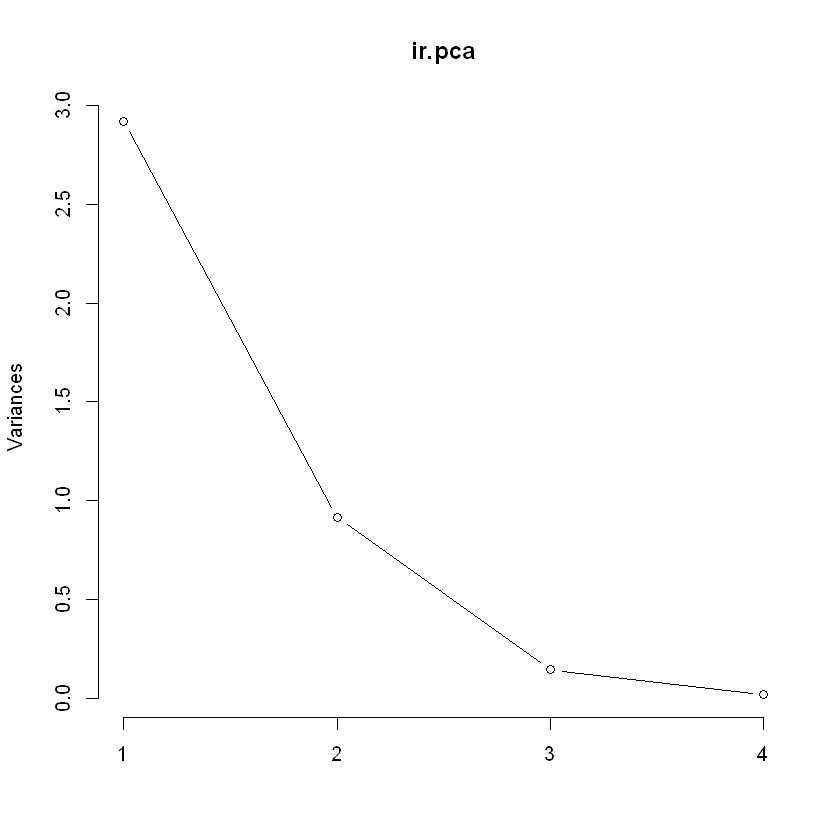

In [7]:
plot(ir.pca, type='l')

### 이 경우는 pc1, pc2까지 사용하는 것을 추천

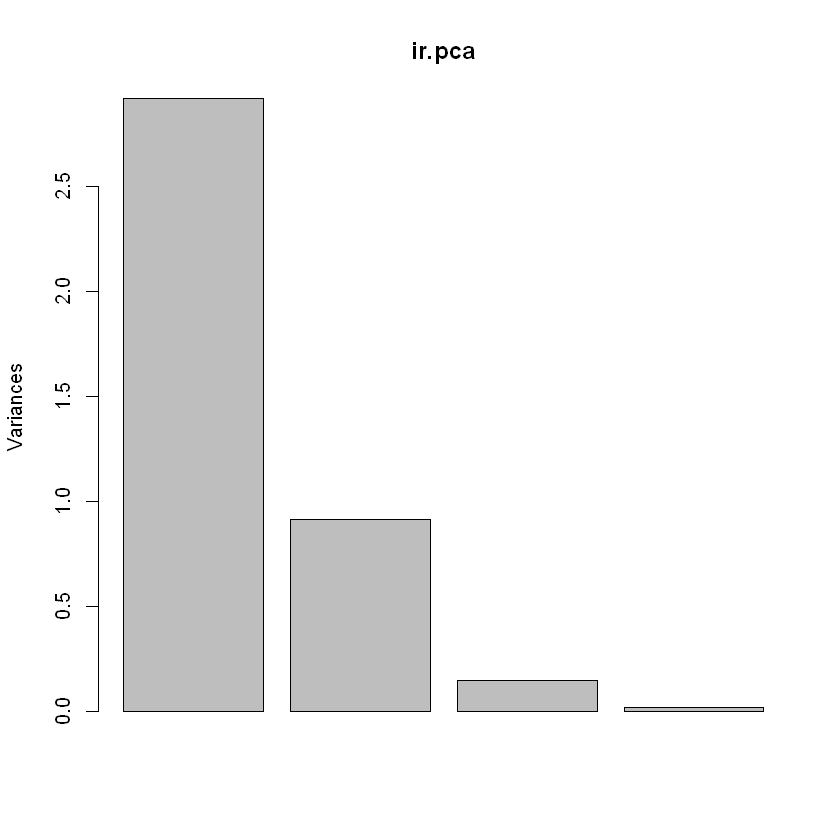

In [9]:
screeplot(ir.pca)

In [11]:
PRC <- as.matrix(iris[,1:4]) %*% ir.pca$rotation
head(PRC)

PC1,PC2,PC3,PC4
2.640270,-5.204041,2.488621,-0.1170332
2.670730,-4.666910,2.466898,-0.1075356
2.454606,-4.773636,2.288321,-0.1043499
2.545517,-4.648463,2.212378,-0.2784174
2.561228,-5.258629,2.392226,-0.1555127
2.975946,-5.707321,2.437245,-0.2237665


In [14]:
ir.pca$rotation

,PC1,PC2,PC3,PC4
Sepal.Length,0.5210659,-0.37741762,0.7195664,0.2612863
Sepal.Width,-0.2693474,-0.92329566,-0.2443818,-0.1235096
Petal.Length,0.5804131,-0.02449161,-0.1421264,-0.8014492
Petal.Width,0.5648565,-0.06694199,-0.6342727,0.5235971


In [15]:
iris.pc <- cbind(as.data.frame(PRC), Species)
head(iris.pc)

PC1,PC2,PC3,PC4,Species
2.640270,-5.204041,2.488621,-0.1170332,setosa
2.670730,-4.666910,2.466898,-0.1075356,setosa
2.454606,-4.773636,2.288321,-0.1043499,setosa
2.545517,-4.648463,2.212378,-0.2784174,setosa
2.561228,-5.258629,2.392226,-0.1555127,setosa
2.975946,-5.707321,2.437245,-0.2237665,setosa


### 차원 축소를 원하면 PC1, PC2 만 사용해서 할 수 있다.

In [16]:
library(e1071)

In [26]:
m1 <- svm(Species ~ ., iris.pc, kernel='linear')
summary(m1)


Call:
svm(formula = Species ~ ., data = iris.pc, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  32

 ( 3 16 13 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [27]:
x <- iris.pc[,-5]
pred <- predict(m1, x)
y <- iris.pc[,5]
table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         0
  virginica       0          2        50

### 오분류율이 2개이다.

In [31]:
m2 <- svm(Species ~., iris, kernel='linear')
summary(m2)


Call:
svm(formula = Species ~ ., data = iris, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  29

 ( 2 15 12 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [42]:
y <- iris[,5]
pred1 <- predict(m2, iris)
table(pred1, y)

            y
pred1        setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         46         1
  virginica       0          4        49

### 주성분분석에 비해 오분류가 많다.